# **Introducción al Procesamiento Digital de Imágenes (PDI)**
Trabajo Practico Nro 1

1.Normalizar los valores de RGB del pixel

2.RGB -> YIQ (utilizando la segunda matriz)

3.Y’ := aY ;

4.I’ := bI ; Q’ := bQ;

5.Chequear que Y’ <= 1 (para que no se vaya de rango)

6.Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226

7.Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)

8.Convertir R’G’B’ a bytes y graficar el pixel


<ipython-input-133-7486e3029fe8>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread('Charly.bmp')


(288, 282, 3)
uint8


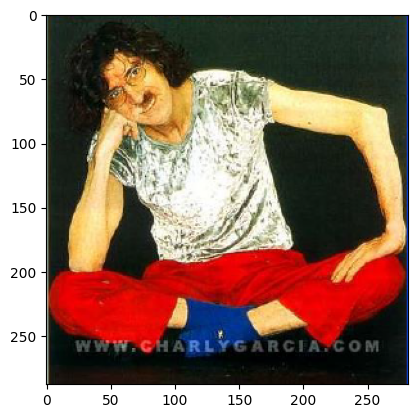

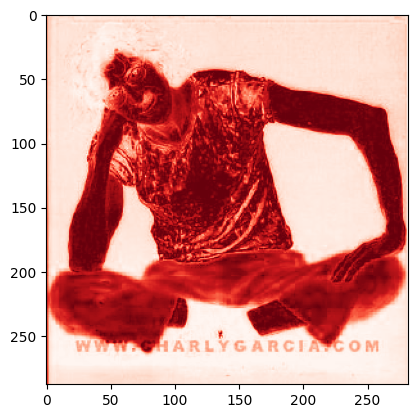

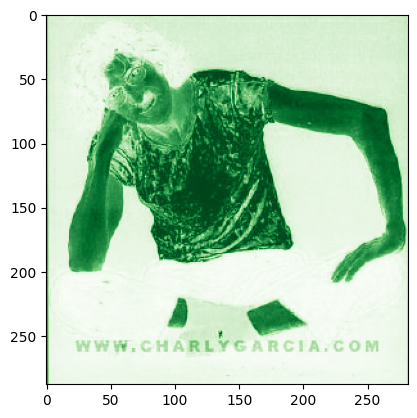

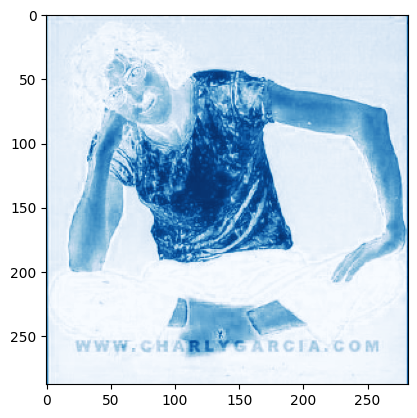

In [133]:
# Impotacion de librerias necesarias

import imageio
import numpy as np
import matplotlib.pyplot as plt  # para utilizar con el comando imshow

#Cargo la imagen,
img=imageio.imread('Charly.bmp')
print(img.shape)  # formato de la imagen, resultado (288,282,3) tamaño 288 x 282 tamaño que seria RGB y un canal alfa
print(img.dtype)  # tipo de dato, resultado : tipo de dato flotante

# Normalizo los valores de RGB del pixel para ello dividimos cada valor en img por 255 para obtener valores entre 0 y 1.
# Luego, aplicamos np.clip() para asegurarnos de que todos los valores estén dentro de ese rango
img = np.clip(img/255,0,1) #normalizando [0,1]
plt.imshow(img)
plt.show()

#Procesando Canales RGB
plt.imshow(img[:, :, 0], cmap='Reds')
plt.show()
plt.imshow(img[:, :, 1], cmap='Greens')
plt.show()
plt.imshow(img[:, :, 2], cmap='Blues')
plt.show()



# **`TRANSFORMACION DE RGB a YIQ - YIQ a RGB - `**


DEFINICION DE FUNCIONES

In [134]:
# La representación en el espacio YIQ es práctica dado que separa la luminancia (Y) de la cromaticidad.
def RGB2YIQ(imgRgb):
    imgYiq = np.zeros(imgRgb.shape) #genera una variable yip tipo matriz de componente cero 0, y con shape le digo que sea del mismo tamaño que la original
    imgYiq[:,:,0] = np.clip( 0.229   *imgRgb[:,:,0] + 0.587   *imgRgb[:,:,1] + 0.114   *imgRgb[:,:,2],       0,1     ) #Y   con Y’ <= 1 para que no se vaya de rango
    imgYiq[:,:,1] = np.clip( 0.595716*imgRgb[:,:,0] - 0.274453*imgRgb[:,:,1] - 0.321263*imgRgb[:,:,2], -0.5957,0.5957) #I  -0.5957 < I’ < 0.5957para que no se vaya de rango
    imgYiq[:,:,2] = np.clip( 0.211456*imgRgb[:,:,0] - 0.522591*imgRgb[:,:,1] + 0.311135*imgRgb[:,:,2], -0.5226,0.5226) #Q  -0.5226 < Q’ < 0.5226 para que no se vaya de rango
    return imgYiq

In [135]:
# Para trabajar con Y, la iluminancia
def modifYIQ(imgYiq,a,b):
    imgYiq[:,:,0] = np.clip( a * imgYiq[:,:,0],      0,1)
    imgYiq[:,:,1] = np.clip( b * imgYiq[:,:,1],-0.5957,0.5957)
    imgYiq[:,:,2] = np.clip( b * imgYiq[:,:,2],-0.5226,0.5226)
    return imgYiq

In [136]:

def YIQ2RGB(imgYip):
    imgRgb = np.zeros(imgYip.shape)
    imgRgb[:,:,0] = np.clip( 1 *imgYip[:,:,0] + 0.9663*imgYip[:,:,1] + 0.6210*imgYip[:,:,2] , 0,1)
    imgRgb[:,:,1] = np.clip( 1 *imgYip[:,:,0] + -0.2721*imgYip[:,:,1] + -0.6474*imgYip[:,:,2] , 0,1)
    imgRgb[:,:,2] = np.clip( 1 *imgYip[:,:,0] + -1.1070*imgYip[:,:,1] + 1.7046*imgYip[:,:,2] , 0,1)
    return imgRgb

# **Convertir de  RGB a YIQ**

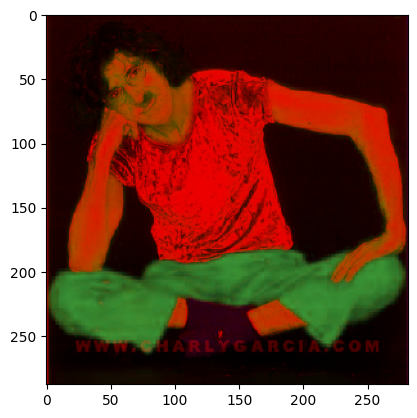

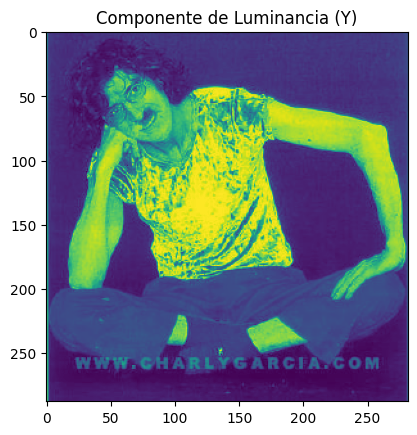

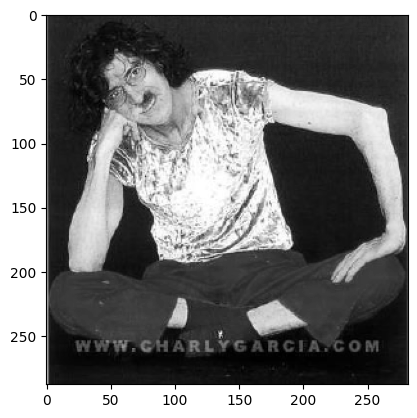

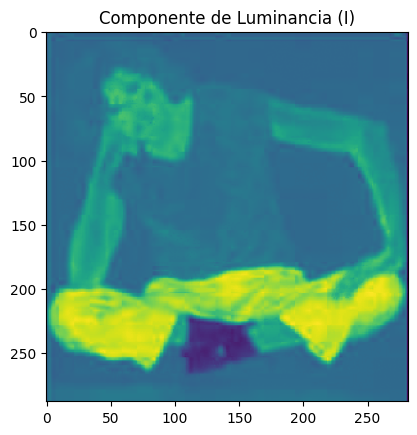

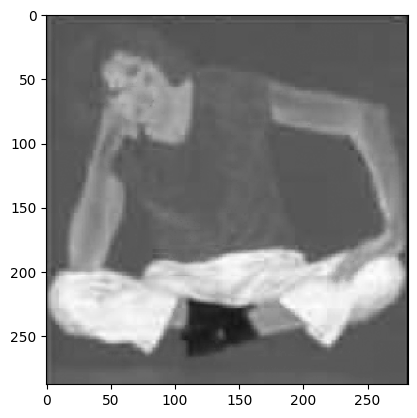

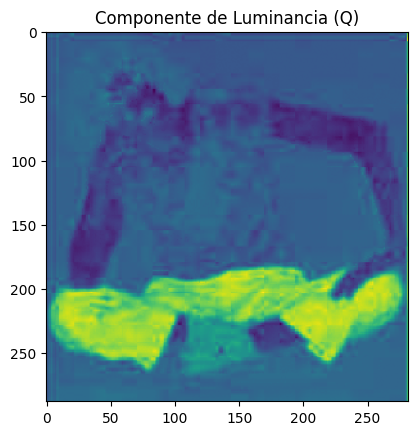

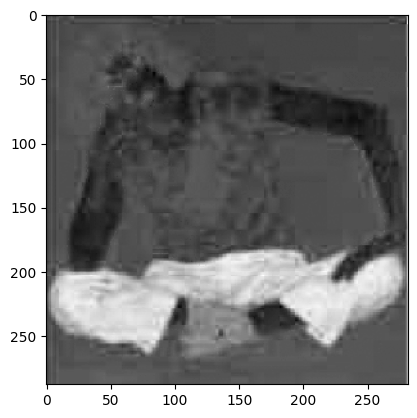

In [137]:
# ********** Convertir de  RGB a YIQ **********************
# llamada a la funcion  RGB2YIQ
imgYiq=RGB2YIQ(img)
plt.imshow(imgYiq)
plt.show()

#imgYiqq=imgYiq
# ********** Mostrar el espacio de color YIQ ***************
# mostrar en el espacio de color Y (luminancia) y escala de grises
plt.title('Componente de Luminancia (Y)')
plt.imshow(imgYiq[:,:,0])
plt.show()
plt.imshow(imgYiq[:,:,0], cmap='gray')
plt.show()
# mostrar en el espacio de color I (crominancia,azul-magenta) y escala de grises
plt.title('Componente de Luminancia (I)')
plt.imshow(imgYiq[:,:,1])
plt.show()
plt.imshow(imgYiq[:,:,1], cmap='gray')
plt.show()
# mostrar en el espacio de color Q (crominancia,color verde-rojo) y escala de grises
plt.title('Componente de Luminancia (Q)')
plt.imshow(imgYiq[:,:,2])
plt.show()
plt.imshow(imgYiq[:,:,2], cmap='gray')
plt.show()



# **Producto por un escalar, luminancia (Y) y la cromaticidad en los canales I y Q**

a= Lumninancia ,
b= Saturacion

Valores:

Entre a:0.2  a  0.6  -> valores oscuro

Entre a:1.0  a  1.8  -> valores claros, brillantes

Entre a:1.0  a  1.8  -> valores muy saturados

La comprobacion dio exitosa

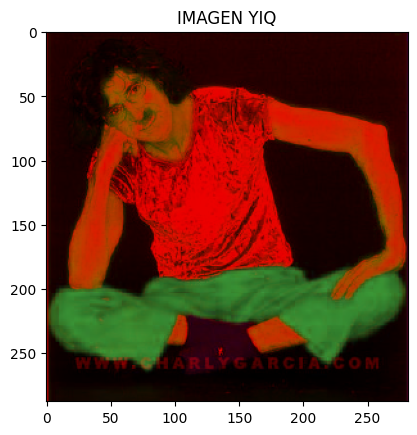

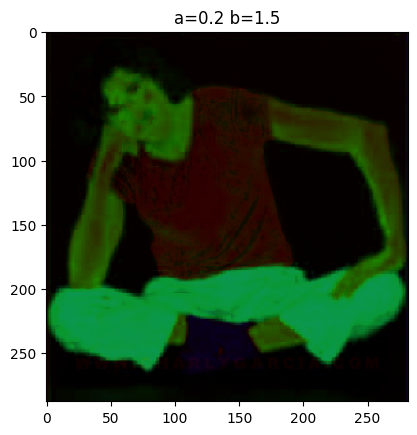

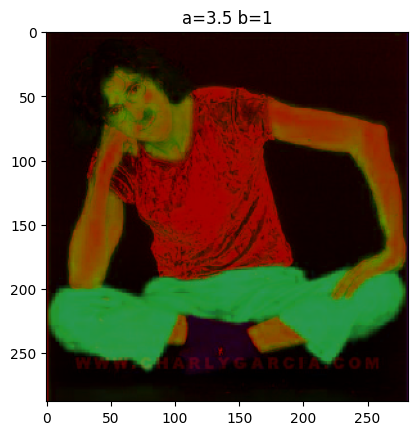

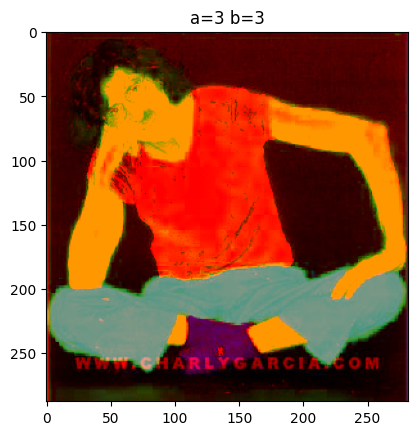

In [138]:
plt.title('IMAGEN YIQ')

#imgYiq = np.clip(imgYiq/255,0,1)
plt.imshow(imgYiq)
#plt.imshow(imgYiq)
plt.show()
# ********** Modificar el espacio YIQ ***************
# modificar (luminancia) a=0.2    (saturacion) b=1.5
plt.title('a=0.2 b=1.5')
a=0.2
b=1.5
img_Yiq = modifYIQ(imgYiq, a, b)
plt.imshow(img_Yiq)
plt.show()

plt.title('a=3.5 b=1')
a=3.5
b=1
img_Yiq = modifYIQ(imgYiq, a, b)
plt.imshow(img_Yiq)
plt.show()

plt.title('a=3 b=3')
a=3
b=3
img_Yiq = modifYIQ(imgYiq, a, b)
plt.imshow(img_Yiq)
plt.show()

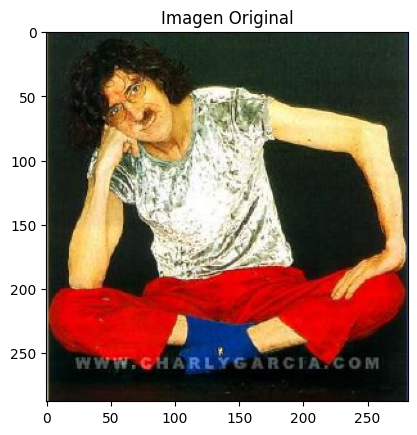

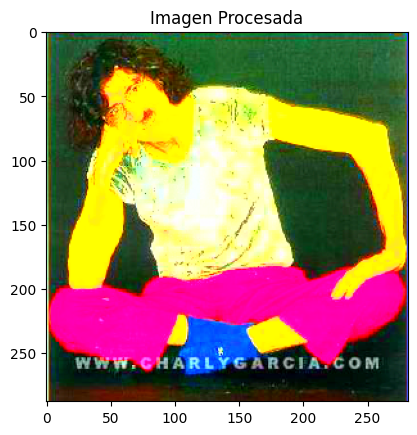

In [140]:
# ********** Convertir de  RGB a YIQ **********************
plt.title('Imagen Original')
plt.imshow(img)
plt.show()

# Convertir de vuelta al rango original
# llamada a la funcion  RGB2YIQ
plt.title('Imagen Procesada')
imgRGB=YIQ2RGB(imgYiq)
plt.imshow(imgRGB)
plt.show()
